# Association Rule Mining 

Install "mlxtend" and "networkx"

In [ ]:
!pip install mlxtend

In [ ]:
!pip install msgpack networkx

Import required packages

In [1]:
import pandas as pd
import numpy as np
# For One-Hot encoding
from mlxtend.preprocessing import OnehotTransactions
# For Apriori Algorithm
from mlxtend.frequent_patterns import apriori
# For Association Rules
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
# For Network Gragh
import networkx as nx
%matplotlib inline
sns.set()

Importing groceries file from folder

In [11]:
data = pd.read_csv('groceries.csv')
df = data.copy()
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


Making sure all items in lower case and spaces are stripped

In [17]:
df['Items'] = df['Items'].str.lower()
df['Items'] = df['Items'].str.strip()

In [18]:
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


Converting the column to list

In [19]:
items = df['Items'].str.split(',').values
type(items)

numpy.ndarray

In [20]:
items

array([list(['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']),
       list(['tropical fruit', 'yogurt', 'coffee']), list(['whole milk']),
       list(['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads']),
       list(['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']),
       list(['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner']),
       list(['rolls/buns']),
       list(['other vegetables', 'uht-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)']),
       list(['pot plants']), list(['whole milk', 'cereals']),
       list(['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate']),
       list(['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes']),
       list(['beef']), list(['frankfurter', 'rolls/buns', 'soda']),
       list(['chicken', 'tropical fruit']),
       list(['butter', 'sugar', 'fruit/vegetable juice', 'newspapers']),


In [21]:
items = items.tolist()
type(items)

list

In [22]:
items

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'uht-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

### Applying One Hot Transaction for Apriori Algorithm

What is One Hot Encoding or Transaction?

<img src="https://i.imgur.com/mtimFxh.png" width=500, height=400>

In [23]:
oht = OnehotTransactions()
oht_ary = oht.fit(items).transform(items)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/home/muhammadtaqi/anaconda3/lib/python3.6/site-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


,abrasive cleaner,artif. sweetener,baby cosmetics,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,...,turkey,uht-milk,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Applying Apriori algorithm

Applying Apriopri algorithm with minimum support 1%

In [24]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.011429                                    (baking powder)
1    0.060000                                             (beef)
2    0.040000                                          (berries)
3    0.031429                                        (beverages)
4    0.064286                                     (bottled beer)
5    0.137143                                    (bottled water)
6    0.048571                                      (brown bread)
7    0.040000                                           (butter)
8    0.032857                                      (butter milk)
9    0.010000                                         (cake bar)
10   0.027143                                            (candy)
11   0.078571                                      (canned beer)
12   0.012857                                      (canned fish)
13   0.010000                                         (cat food)
14   0.011429            

Making rules using at least 50% confidence

In [30]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cereals),(whole milk),0.011429,0.251429,0.010000,0.875000,3.480114,0.007127,5.988571
1,(frankfurter),(rolls/buns),0.068571,0.218571,0.034286,0.500000,2.287582,0.019298,1.562857
2,(frozen dessert),(whole milk),0.014286,0.251429,0.011429,0.800000,3.181818,0.007837,3.742857
3,(ham),(whole milk),0.022857,0.251429,0.014286,0.625000,2.485795,0.008539,1.996190
4,(margarine),(whole milk),0.051429,0.251429,0.025714,0.500000,1.988636,0.012784,1.497143
5,(pip fruit),(whole milk),0.045714,0.251429,0.022857,0.500000,1.988636,0.011363,1.497143
6,(sliced cheese),(rolls/buns),0.024286,0.218571,0.014286,0.588235,2.691273,0.008978,1.897755
7,(waffles),(whole milk),0.025714,0.251429,0.012857,0.500000,1.988636,0.006392,1.497143
8,"(yogurt, curd)",(whole milk),0.024286,0.251429,0.014286,0.588235,2.339572,0.008180,1.817959
9,"(whole milk, frankfurter)",(rolls/buns),0.021429,0.218571,0.011429,0.533333,2.440087,0.006745,1.674490


Checking comparison of Support, Confidence and Lift

/home/muhammadtaqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/muhammadtaqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/muhammadtaqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


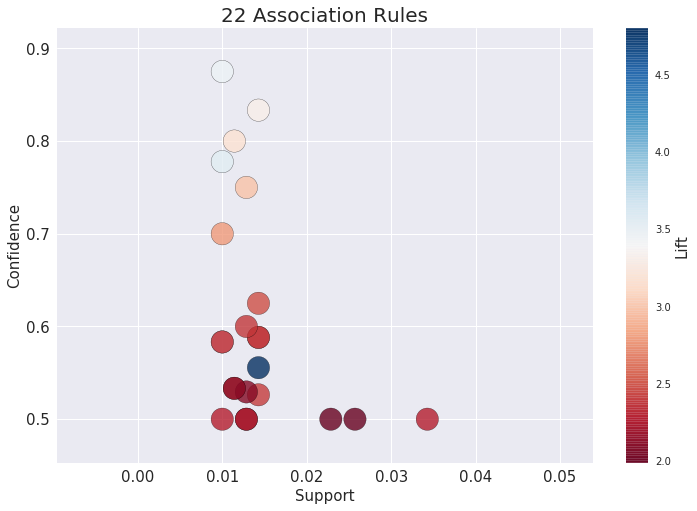

In [31]:
plt.figure(figsize=(12,8))
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])
lift=rules.as_matrix(columns=['lift'])
points=plt.scatter(support, confidence, alpha=0.8,s=500,c=lift,cmap="RdBu",edgecolors='black')
cb=plt.colorbar(points)
cb.set_label(label='Lift',size=15)
plt.title('22 Association Rules',fontsize=20)
plt.xlabel('Support',fontsize=15)
plt.ylabel('Confidence',fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

### Network Graph

A network graph consists of "Node" for each event and "Edge" which defines relation which can be undirected, directed or wighted

<img src="network.png" width=45%><img src="social.png" width=45%>


**Network Graph Types**

<img src="https://www.ebi.ac.uk/training/online/sites/ebi.ac.uk.training.online/files/resize/Fig_edge_types-700x251.png">

<img src="http://www.r-graph-gallery.com/wp-content/uploads/2017/04/247_igraph_layout_types.png" width=60%>

Making function of plotting directed network graph for Association rules visualization

In [32]:
def draw_graph(rules, rules_to_show):
    plt.figure(figsize=(12,8))
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    for i in range (rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:        
            G1.add_nodes_from(nodes_for_adding=[a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:     
            G1.add_nodes_from(nodes_for_adding=[c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
    for node in G1:
        if node[:1] == 'R':
            color_map.append('black')
        else:
            color_map.append('turquoise')
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos,font_size=16)
    plt.title('Network visualizing association rules',fontsize=20)
    plt.show()

Plotting network graph

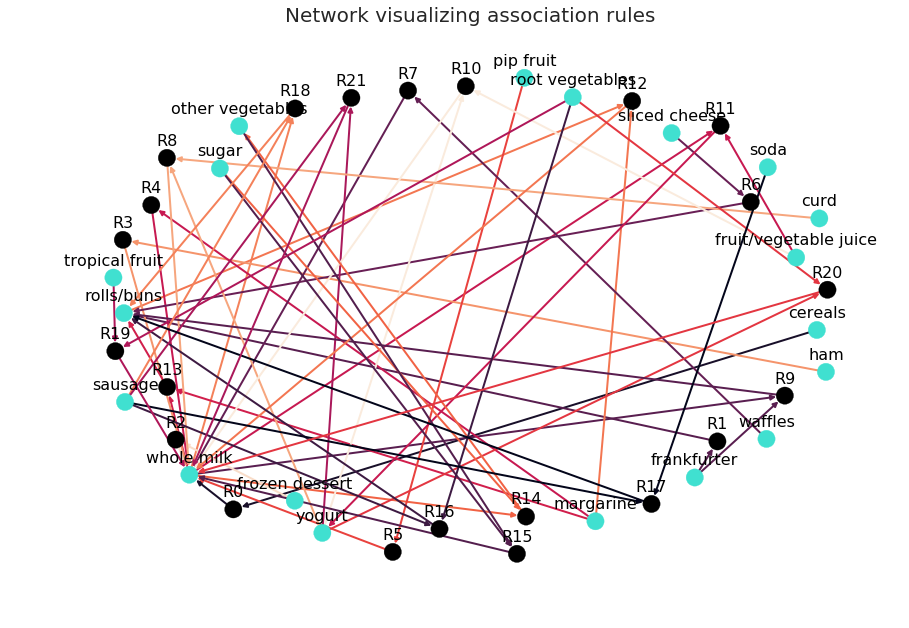

In [33]:
draw_graph(rules, 22)